In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/WorkSpace2/GIT/Machine_Learning/Polynomial_Regression/Position_Salaries.csv')
print(len(dataset))
dataset.head(5)

10


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [26]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X,y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


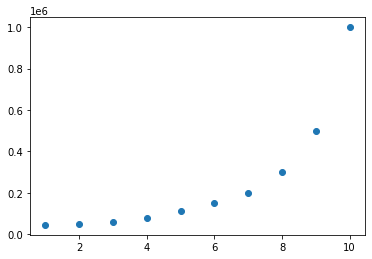

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X,y) 

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

[ 44275.9295499  543473.58121331] [ 60000 500000]


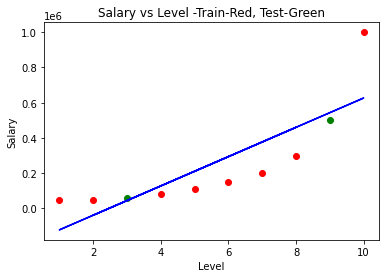

In [43]:
#X^2+2x+1
#y=X^2+mx+c
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin_reg=lin_reg.predict(X_test)
print(y_pred_lin_reg,y_test)

# Visualising the Train set results
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Salary vs Level -Train-Red, Test-Green')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [30]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_term = PolynomialFeatures(degree = 4)
X_train_poly=poly_term.fit_transform(X_train)
poly_term.fit(X_train_poly,y_train) #intermediate model .we need to combine with linear model
#Getting poly: x^2 term
lin_reg2=LinearRegression()
lin_reg2.fit(X_train_poly,y_train)
#===================

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred2_poly=lin_reg2.predict(poly_term.fit_transform(X_test))
print(y_pred2_poly,y_test)
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_pred2_poly,y_test))

[ 62618.48984248 554488.61683452] [ 60000 500000]
r2_score: 0.9753995839802772


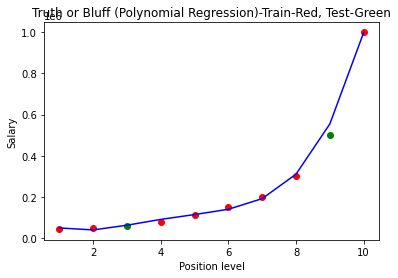

In [44]:
# Visualising the Polynomial Regression results -Train data and Test data
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X, lin_reg2.predict(poly_term.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)-Train-Red, Test-Green')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()